# **Trabajo Practico 1: Modelos Predictivos**

*Lorenzo Nascimbene & Federico Zafran*


# Importacion de Librerias


In [2]:
import pandas as pd
import seaborn as sns

# Punto 1:
Investigar y seleccionar un dataset que cumpla con tener entre 1000 y 10.000 muestras, 5 o más atributos numéricos y al menos un atributo categórico (Recomendación: seleccionar un atributo a predecir binario). De encontrar algún dataset sin atributos categóricos, ¿Como se podría generar uno binario a partir de los atributos numéricos? Se recomienda utilizar Kaggle para la búsqueda del dataset. Antes de avanzar con el trabajo práctico, corroborar el dataset en clase.

In [4]:
Bangalore_df = pd.read_csv("Bangalore.csv")

In [5]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [6]:
Bangalore_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


Elegimos este dataset, el cual cuenta con ls requisitos. Tiene mas de 5 atributos numéricos y 1 categórico.También cuenta con mas de 1000 y menos de 10000 muestras.

Vamos a predecir el precio.

In [7]:
Bangalore_df = Bangalore_df[["Location", "Price", "Area", "No. of Bedrooms","Gymnasium", "SwimmingPool","24X7Security", "CarParking",]]
Bangalore_df.head()

,Location,Price,Area,No. of Bedrooms,Gymnasium,SwimmingPool,24X7Security,CarParking
0,JP Nagar Phase 1,30000000,3340,4,1,1,1,0
1,Dasarahalli on Tumkur Road,7888000,1045,2,1,1,1,1
2,Kannur on Thanisandra Main Road,4866000,1179,2,1,1,1,0
3,Doddanekundi,8358000,1675,3,0,0,0,0
4,Kengeri,6845000,1670,3,1,1,1,1


In [13]:
Bangalore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Location         6207 non-null   object
 1   Price            6207 non-null   int64 
 2   Area             6207 non-null   int64 
 3   No. of Bedrooms  6207 non-null   int64 
 4   Gymnasium        6207 non-null   int64 
 5   SwimmingPool     6207 non-null   int64 
 6   24X7Security     6207 non-null   int64 
 7   CarParking       6207 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 388.1+ KB


# Punto 2:

Realizar un análisis exploratorio de los datos. Se recomienda utilizar gráficos para visualizar la distribución de los datos y la correlación entre los atributos. Se recomienda utilizar la librería seaborn para realizar los gráficos.

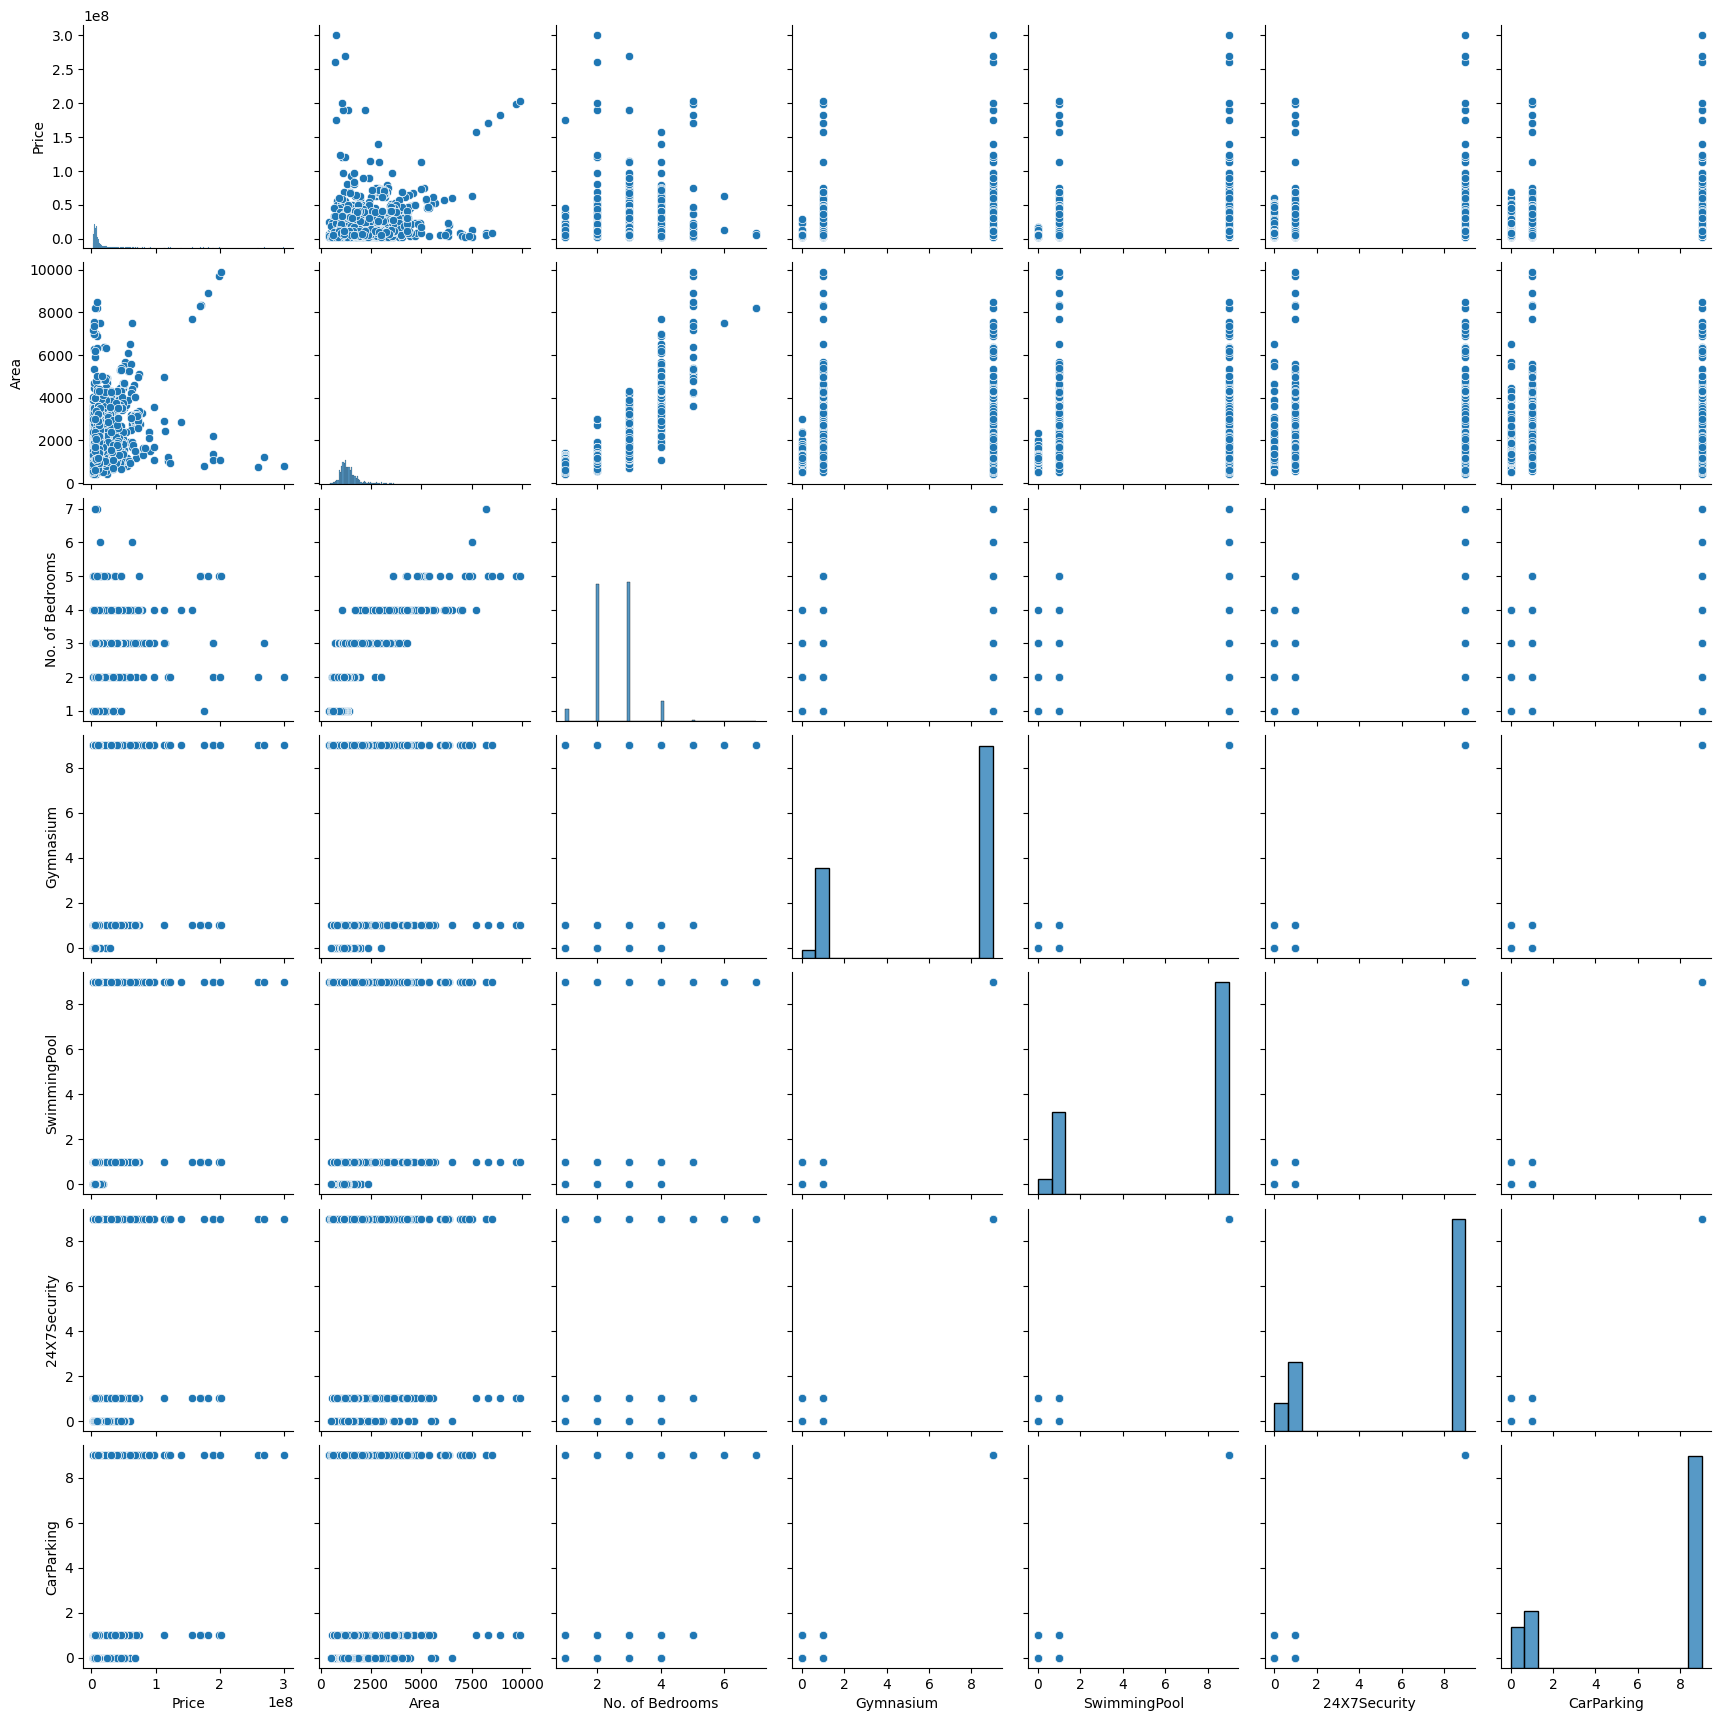

In [8]:
sns.pairplot(Bangalore_df)

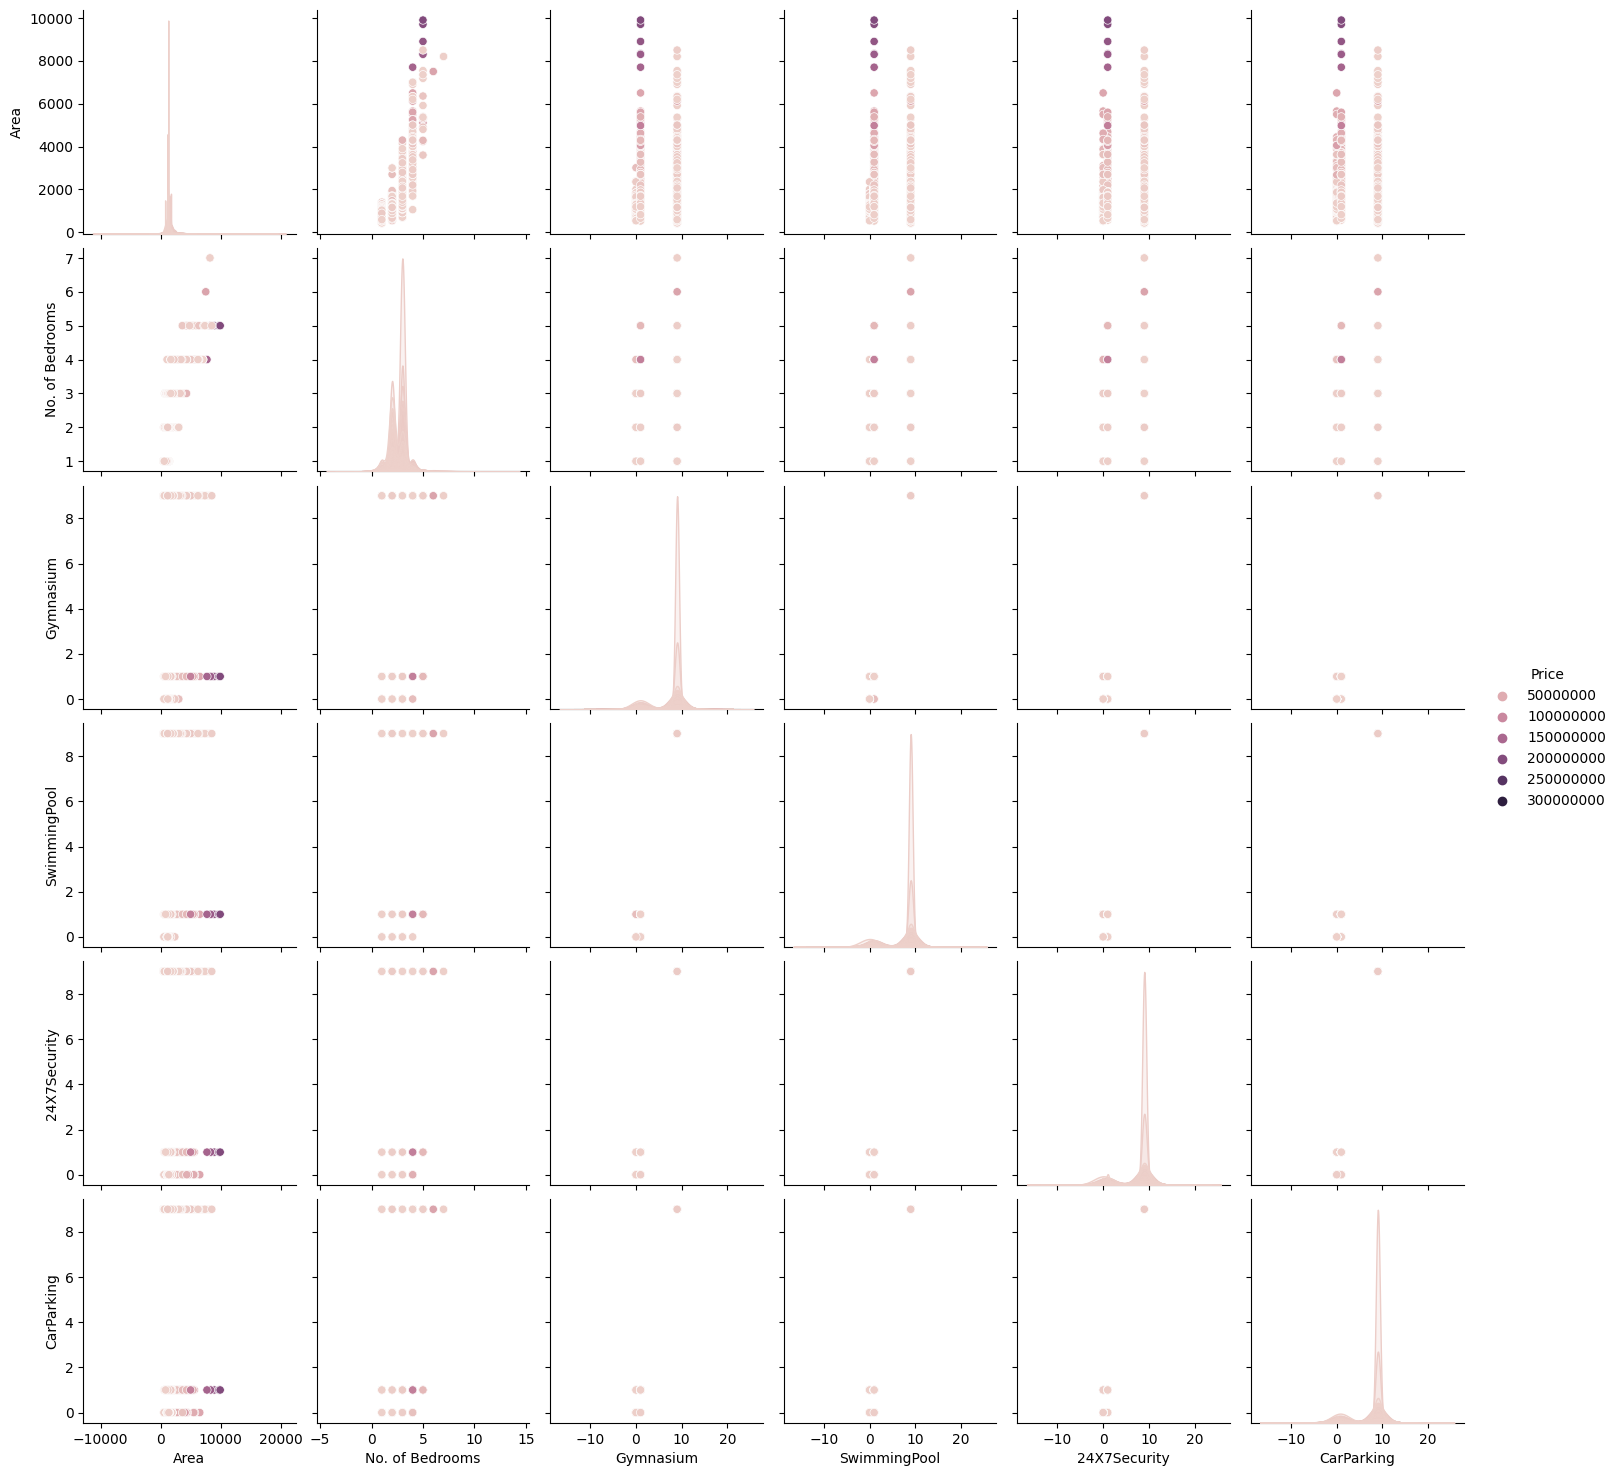

In [9]:
sns.pairplot(Bangalore_df, hue="Price")

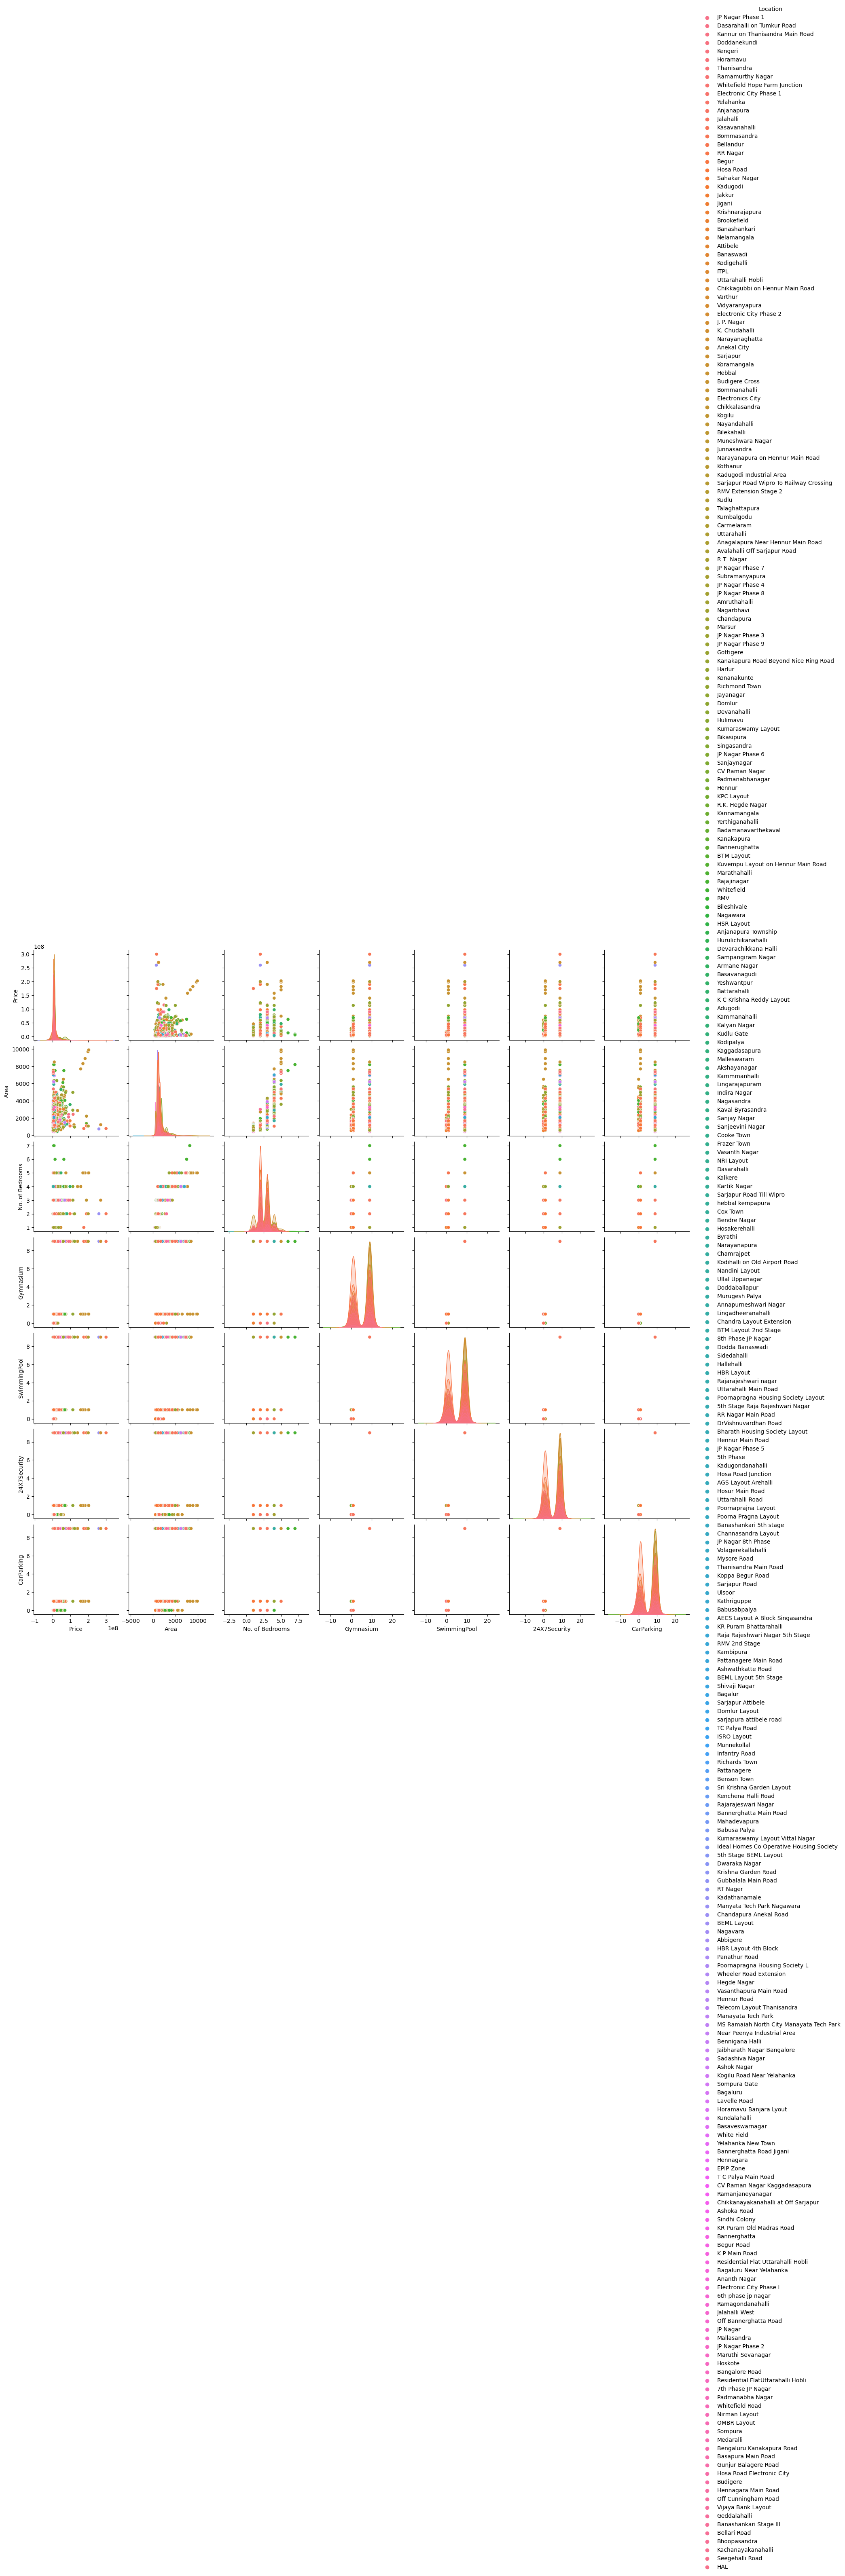

In [10]:
sns.pairplot(Bangalore_df, hue="Location")

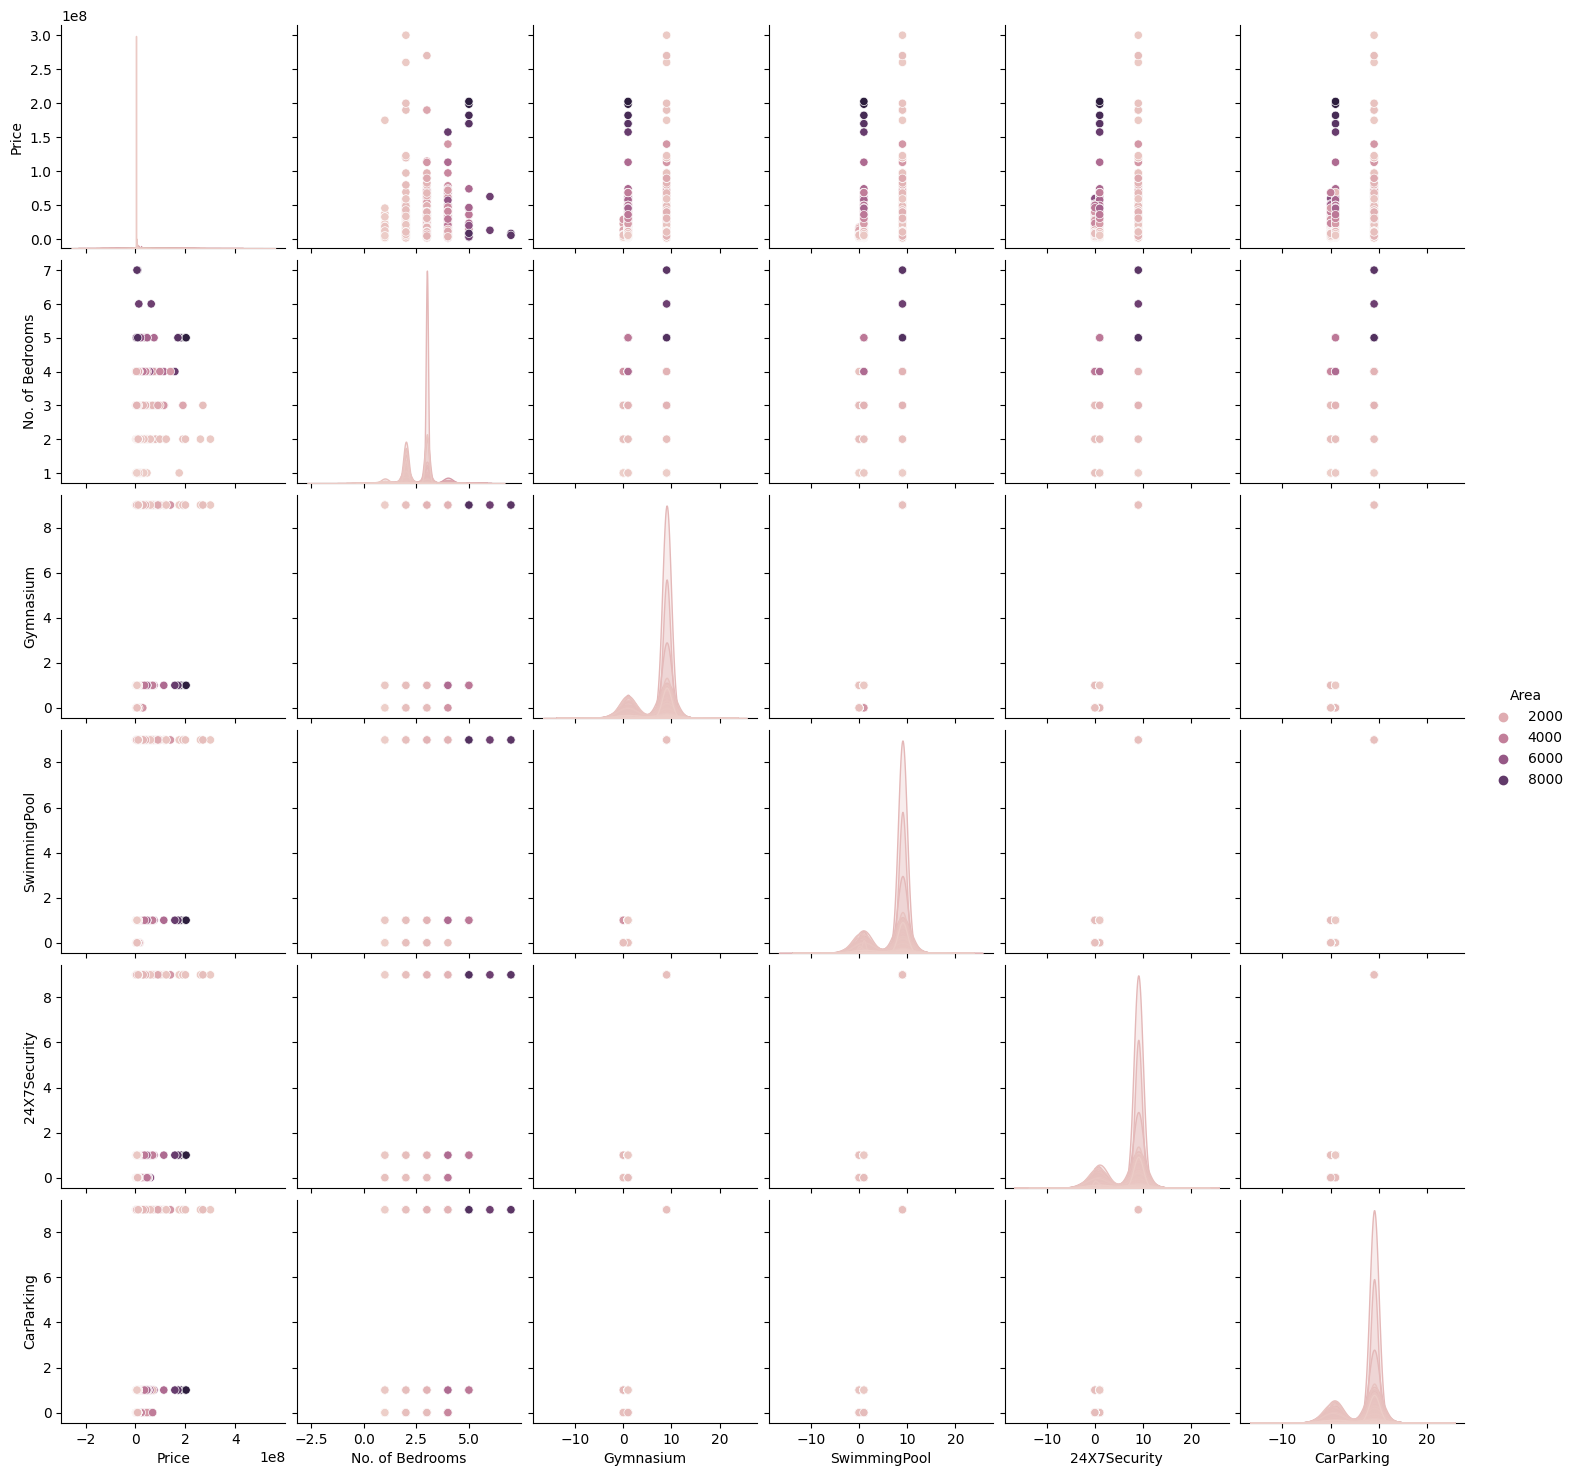

In [11]:
sns.pairplot(Bangalore_df, hue="Area")

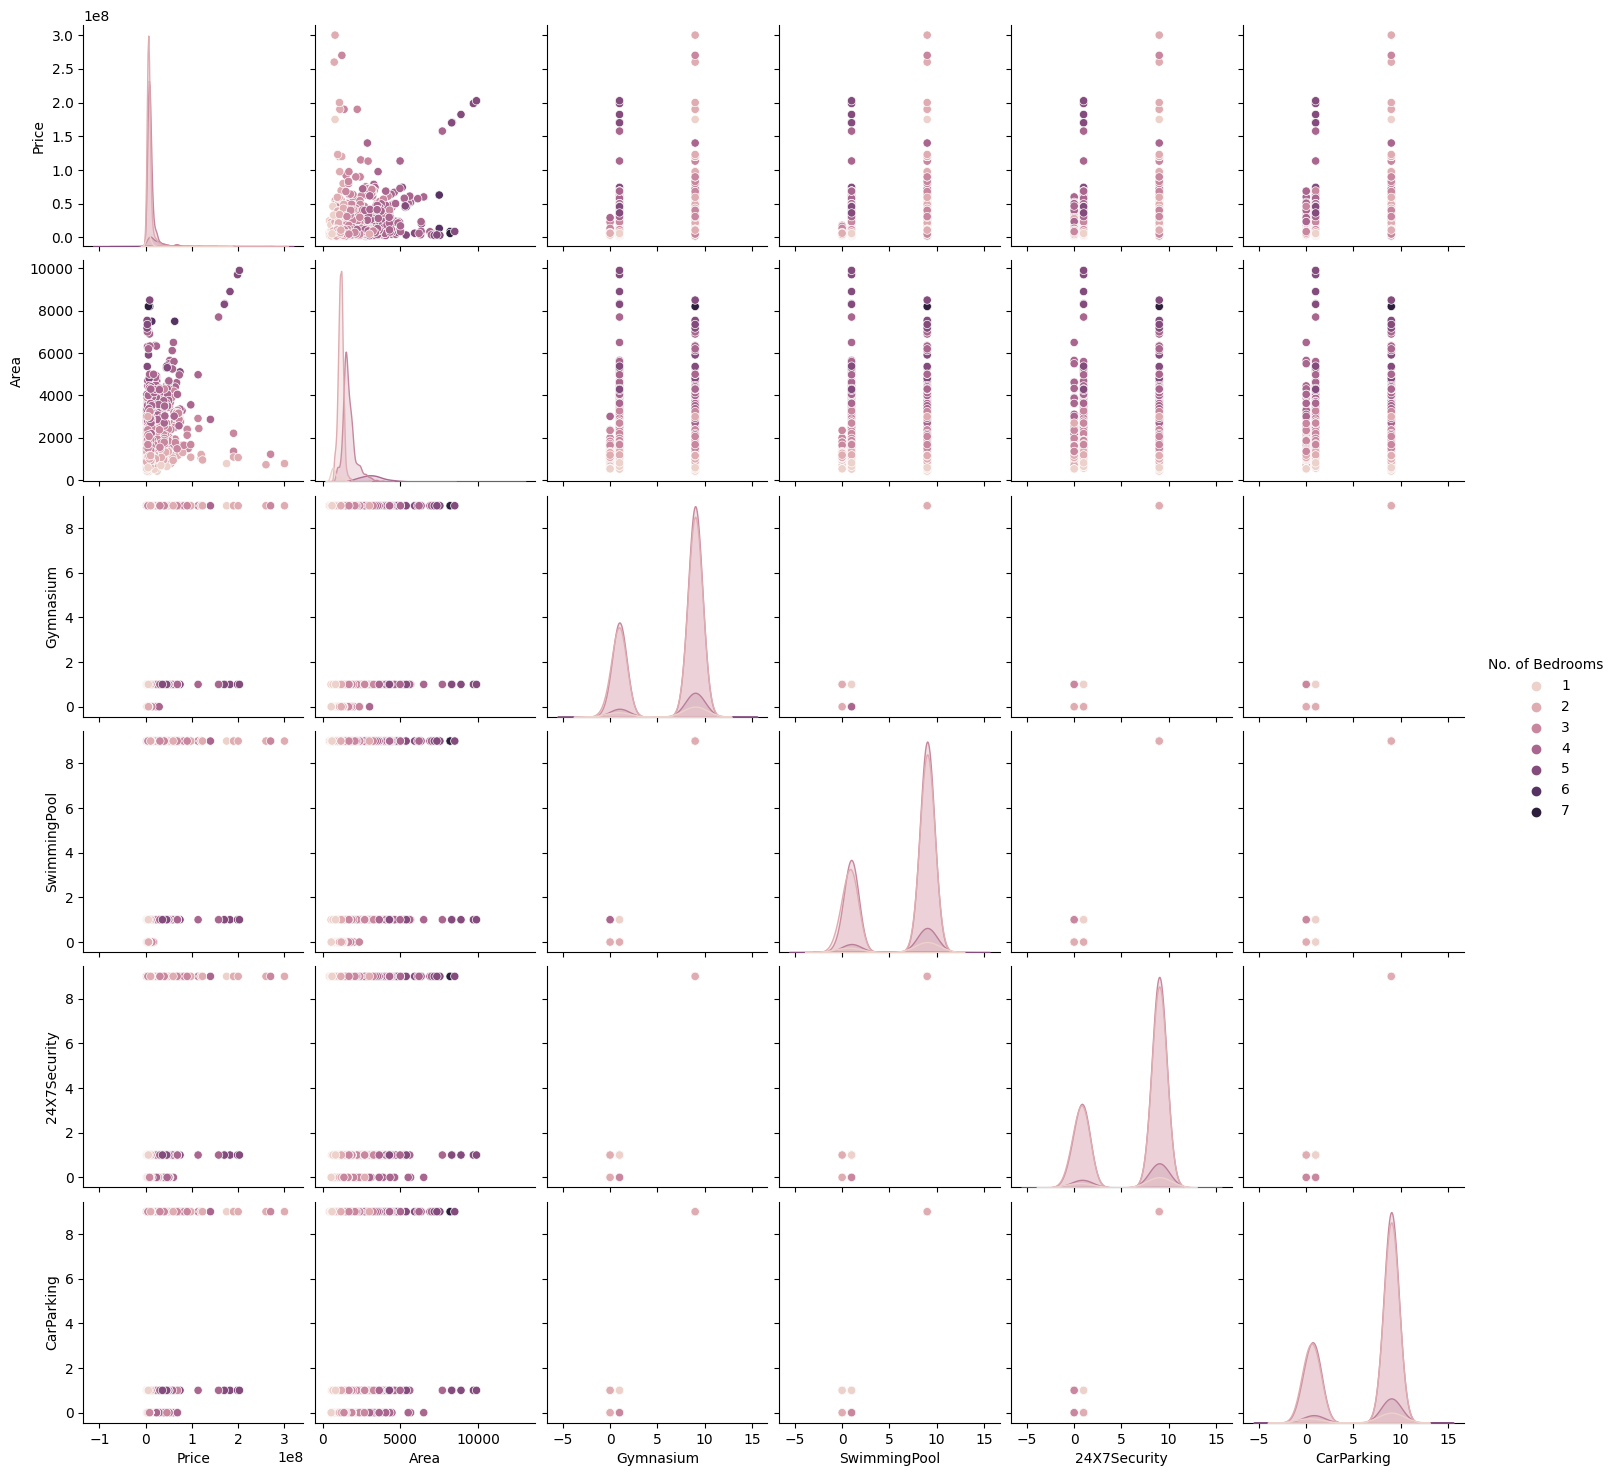

In [12]:
sns.pairplot(Bangalore_df, hue="No. of Bedrooms")

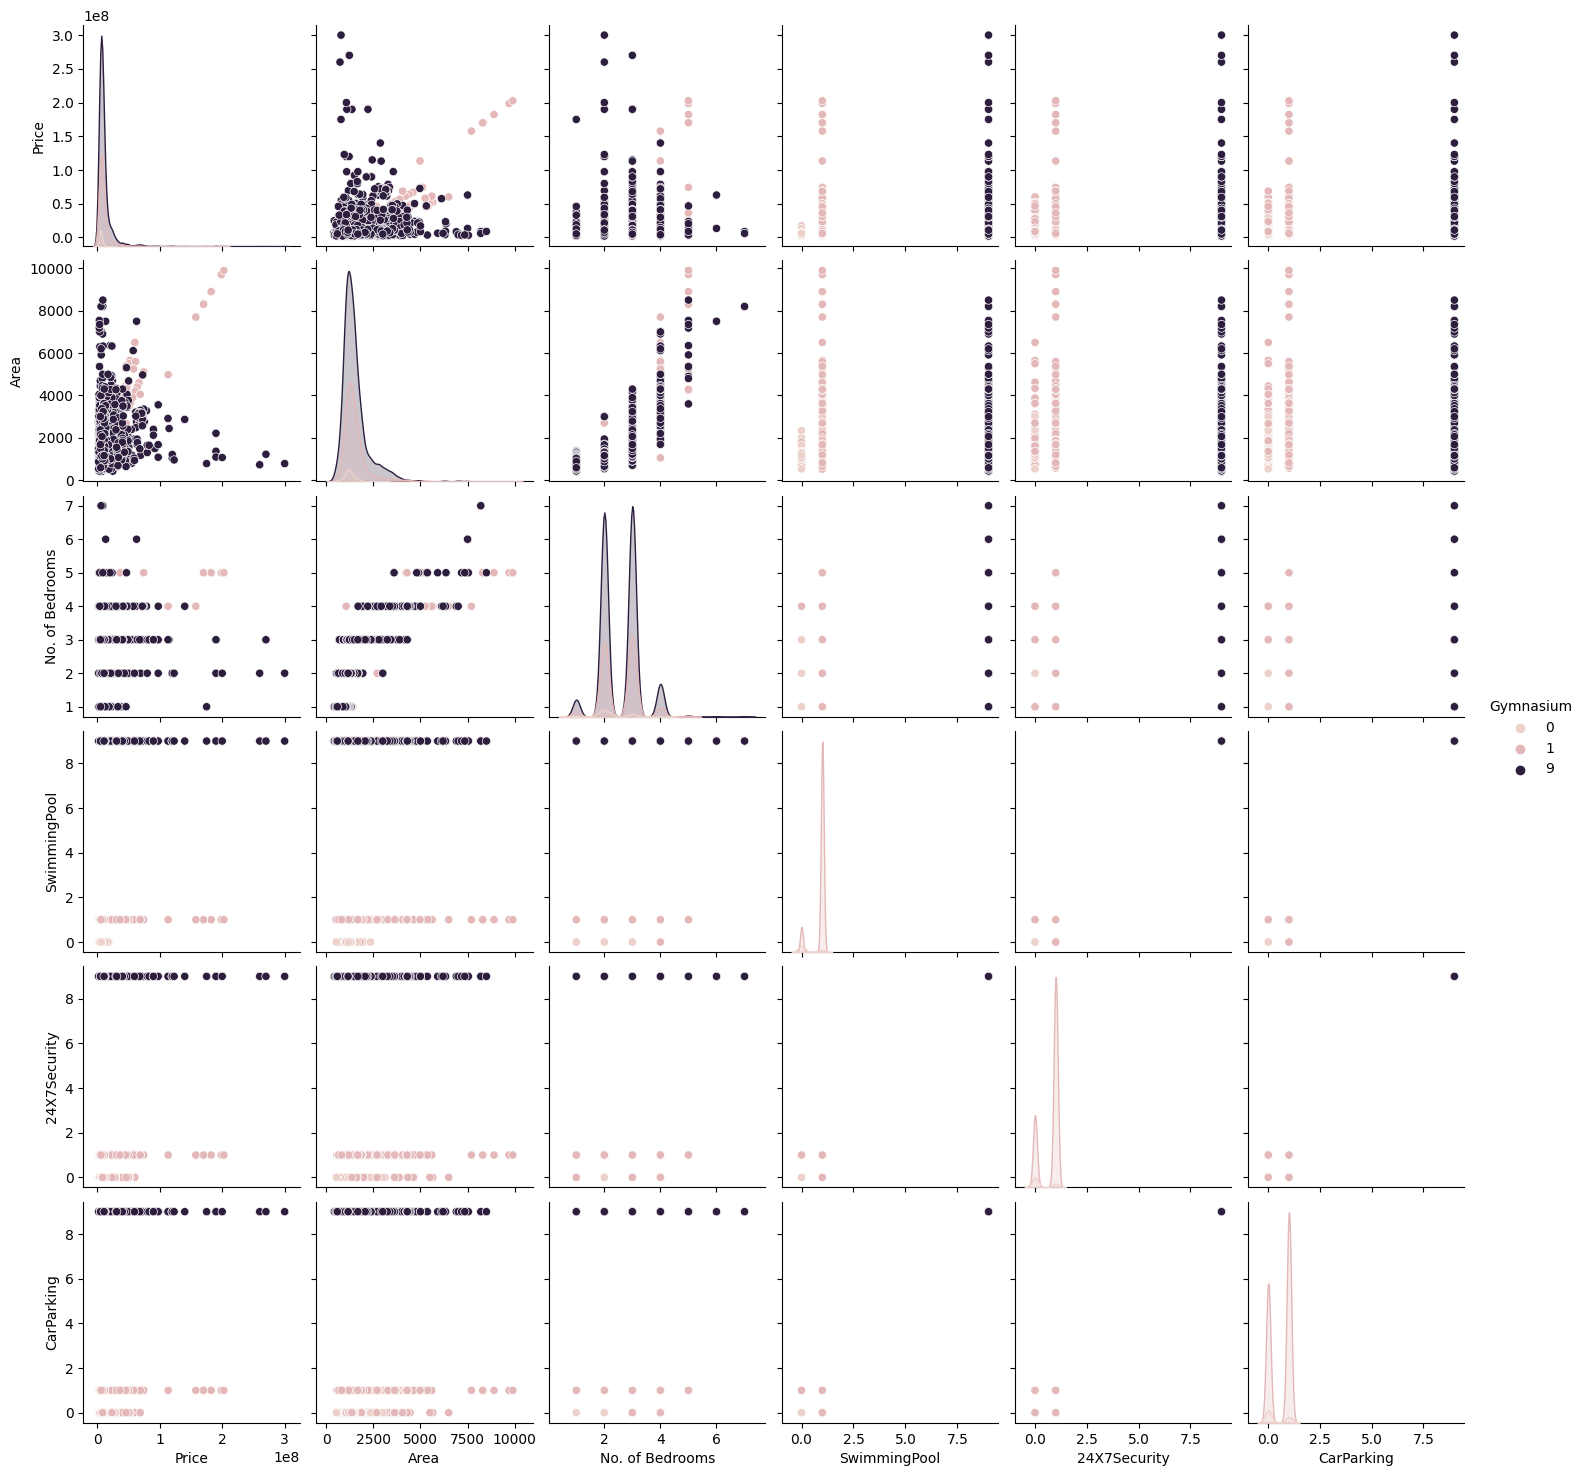

In [14]:
sns.pairplot(Bangalore_df, hue="Gymnasium")

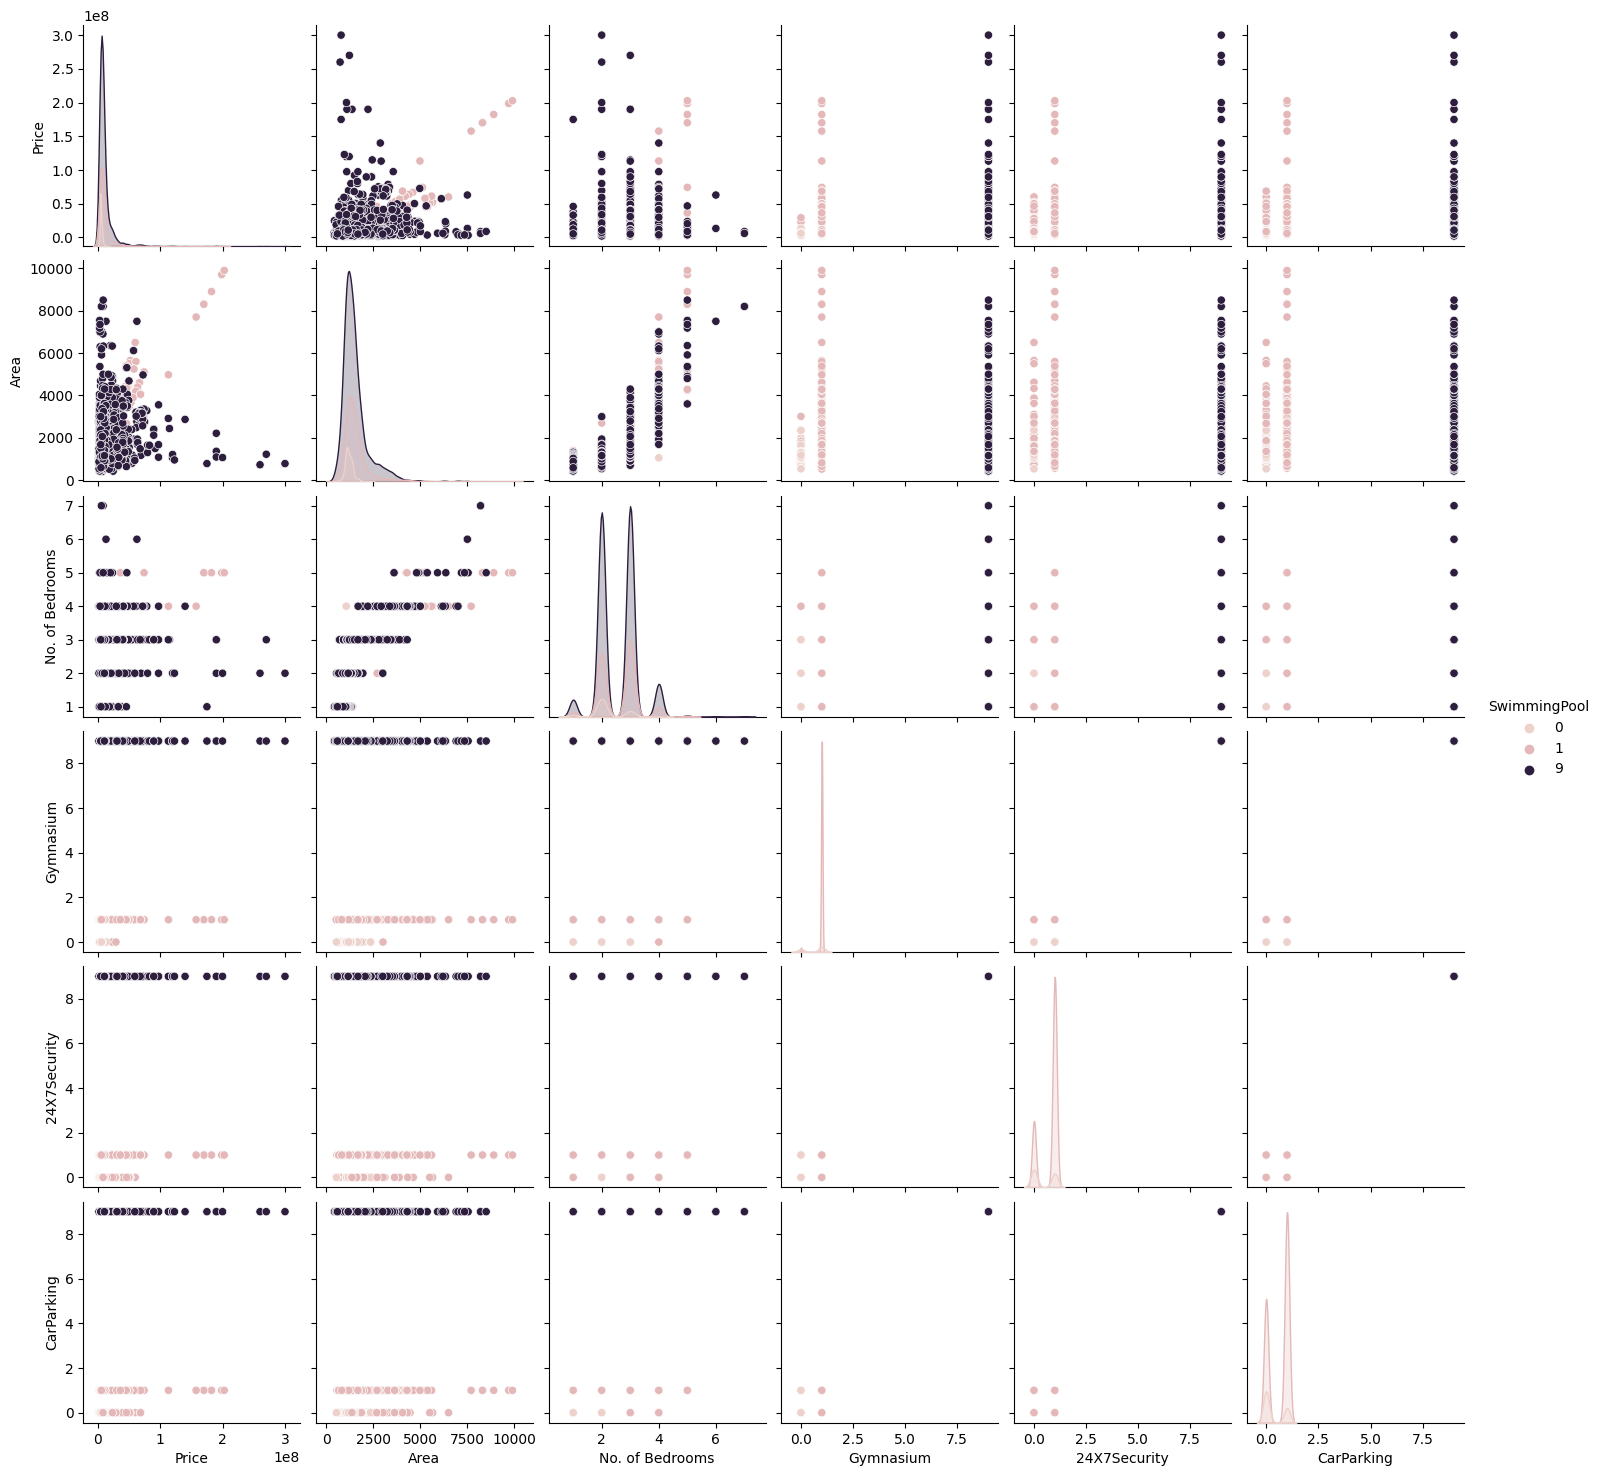

In [15]:
sns.pairplot(Bangalore_df, hue="SwimmingPool")

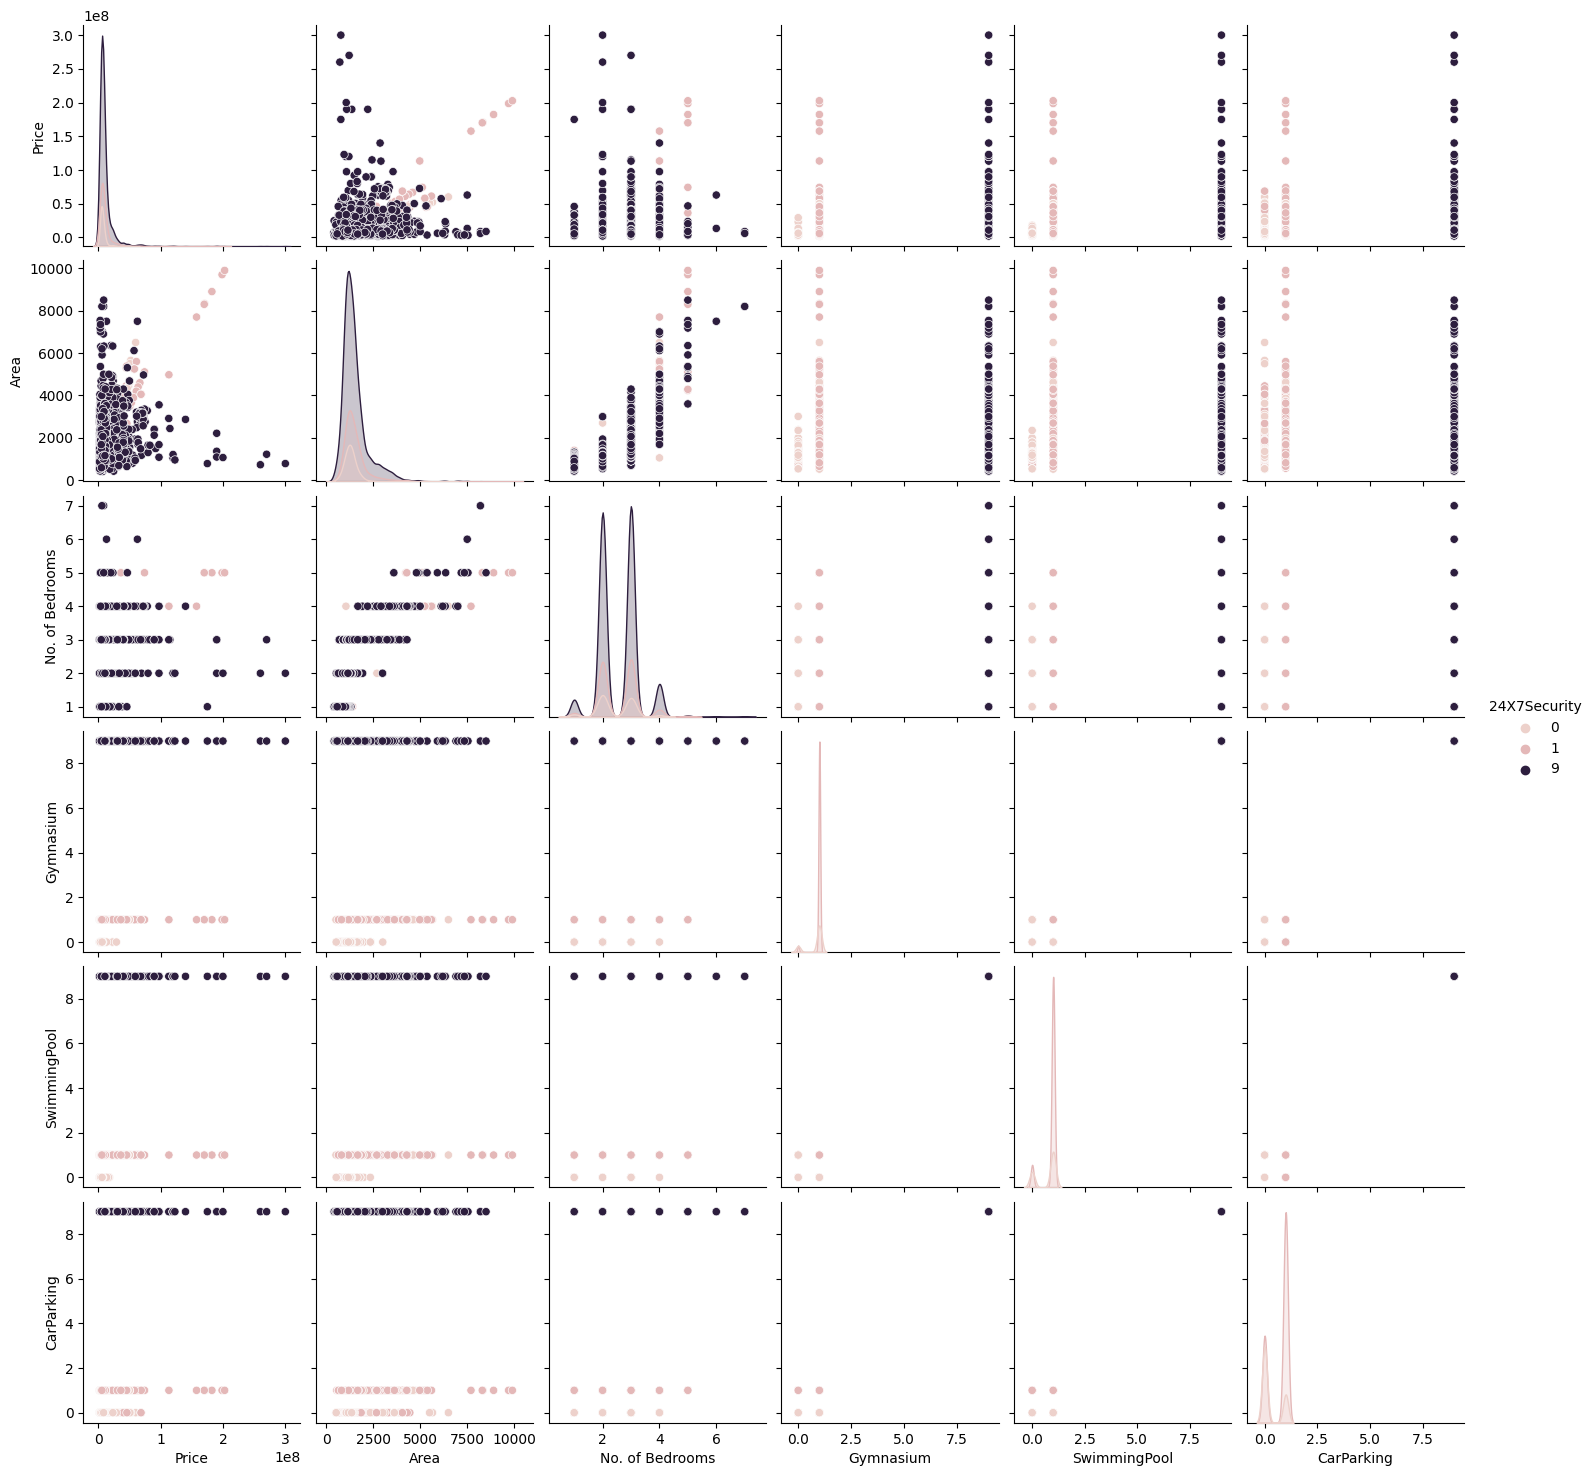

In [16]:
sns.pairplot(Bangalore_df, hue="24X7Security")

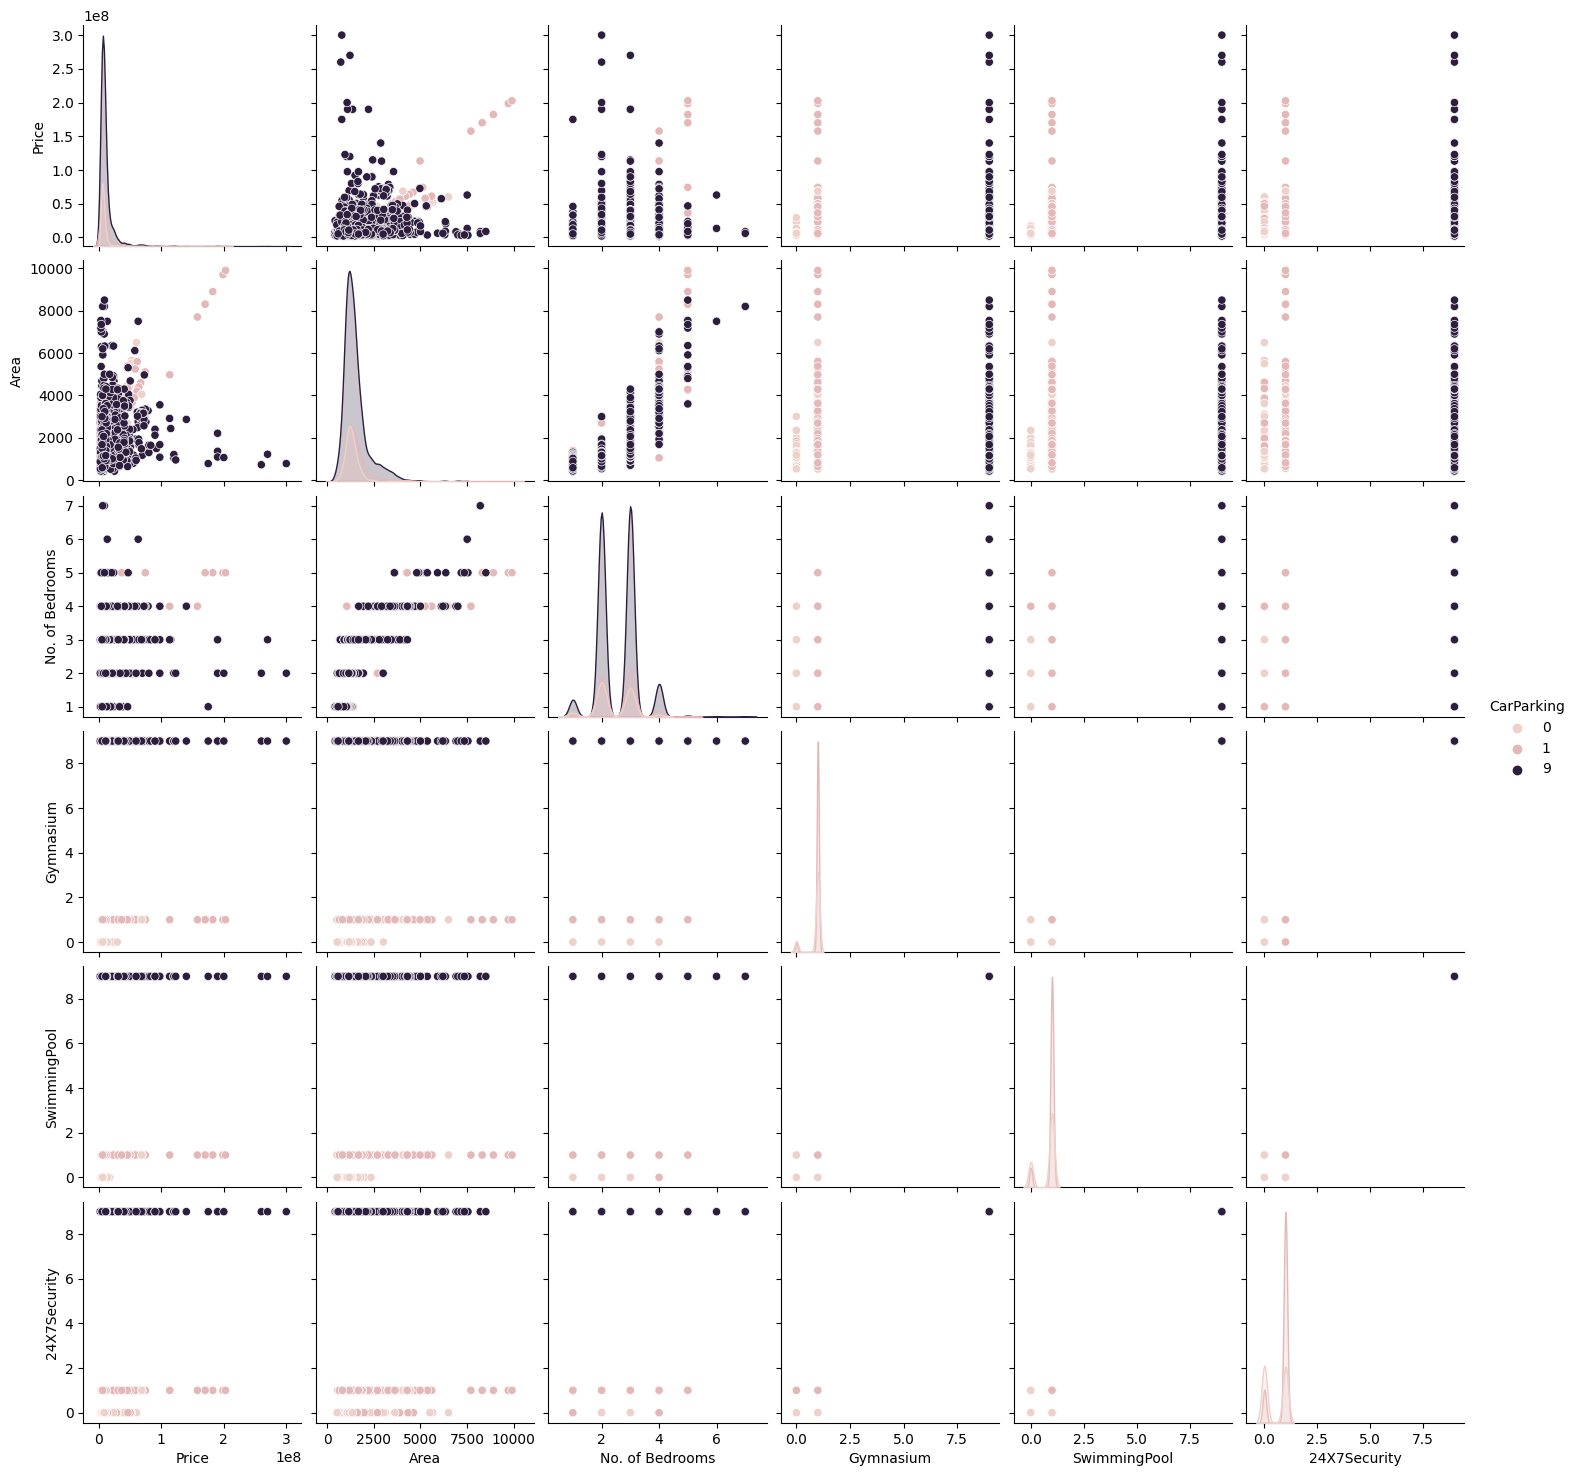

In [17]:
sns.pairplot(Bangalore_df, hue="CarParking")

# Punto 3:

Como resultado del análisis exploratorio, seleccionar un atributo categórico y un atributo numérico para realizar un modelo de clasificación. Se recomienda utilizar la función LabelEncoder de SciKit-Learn para convertir el atributo categórico a numérico.



In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [20]:
label_encoder = LabelEncoder()
Bangalore_df['Location'] = label_encoder.fit_transform(Bangalore_df['Price'])

# Punto 4
Realizar una partición de los datos en conjuntos de entrenamiento y test. La proporción con la cual hacen esta partición es libre. Se recomienda utilizar la función train_test_split de SciKit-Learn.

In [ ]:
X = Bangalore_df[['Price']]
y = Bangalore_df['Location']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
train, test = train_test_split(Bangalore_df, test_size = 0.23)

# Punto 5
Para el atributo numérico a predecir seleccionado:

Realizar un modelo de regresión lineal utilizando la clase LinearRegression de SciKit-Learn.
Realizar un modelo de Árbol de Decisión utilizando la clase DecisionTreeRegressor de SciKit-Learn. Seleccionar hiperparámetros que les parezca mejoren el modelo.
Responder: ¿Que formas tienen de evaluar los resultados de cada árbol de decisión? ¿Como eligen "el mejor árbol"? ¿Como se comparan los resultados de los modelos de regresión lineal y de árbol de decisión?

Sugerencia: Aprovechar los conceptos de validación y de validación cruzada para evaluar los modelos. Pueden utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

Se recomienda utilizar la función cross_val_score de SciKit-Learn para evaluar los modelos.

In [33]:
clf = DecisionTreeClassifier()

In [35]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7544283413848631


# Punto 6
Para el atributo categórico a predecir seleccionado
Realizar un modelo de clasificación utilizando la clase LogisticRegression de SciKit-Learn.
Realizar un modelo de clasificación utilizando la clase DecisionTreeClassifier de SciKit-Learn.
Responder las mismas preguntas que en el punto 5 para este caso.

# Punto 7
Comparar distintos métodos de validación cruzada. ¿Que ventajas y desventajas tiene cada uno?



# Punto 8 (Conclusion)
Escribir una conclusión sobre el trabajo realizado.

